In [ ]:
!pip install mlflow 

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import mlflow
import mlflow.sklearn
from mlflow import log_metric, log_param, log_artifacts


In [ ]:
mlflow.autolog()

2022/06/12 17:02:13 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2022/06/12 17:02:13 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


LOADING AND PERFORMING BASIC EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


IMPORTING DATA

In [ ]:
titanicdata=pd.read_csv('TitanicDataSet.csv')

In [ ]:
titanicdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanicdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanicdata.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanicdata.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

MORE THAN 70 % OF CABIN VALUES ARE MISSING, REDUNDANT DATA DELETED 

In [ ]:
titanic=titanicdata.drop(columns=['Cabin','PassengerId','Name','Ticket'],axis=1)

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

MODE VALUE OF EMBARKED IS REPLACED WITH MISSING VALUES

In [ ]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
titanic['Embarked'].replace(to_replace=np.nan, value='S', inplace=True)

In [ ]:
titanic['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
titanic1=pd.get_dummies(titanic)
titanic1.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
titanic1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
titanic1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    uint8  
 7   Sex_male    891 non-null    uint8  
 8   Embarked_C  891 non-null    uint8  
 9   Embarked_Q  891 non-null    uint8  
 10  Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


In [ ]:
titanic1.Age.fillna(int(titanic1['Age'].median()), inplace = True)

In [ ]:
titanic1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    uint8  
 7   Sex_male    891 non-null    uint8  
 8   Embarked_C  891 non-null    uint8  
 9   Embarked_Q  891 non-null    uint8  
 10  Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


In [ ]:
titanic1.corr()['Survived']

Survived      1.000000
Pclass       -0.338481
Age          -0.064910
SibSp        -0.035322
Parch         0.081629
Fare          0.257307
Sex_female    0.543351
Sex_male     -0.543351
Embarked_C    0.168240
Embarked_Q    0.003650
Embarked_S   -0.149683
Name: Survived, dtype: float64

<AxesSubplot:>

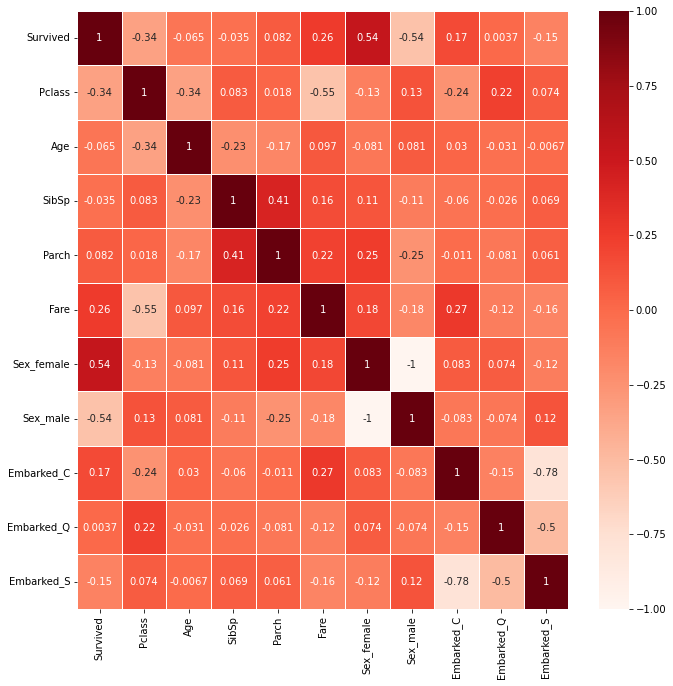

In [ ]:
fig,ax=plt.subplots(figsize=(11,11))
sns.heatmap(titanic1.corr(),annot=True,linewidths=.5,ax=ax,cmap='Reds',vmax=1, vmin=-1)

SPLITTING

In [ ]:
titanic2=titanic1.drop(columns=['Survived'])
X=titanic2.values
y=titanic1['Survived'].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

In [ ]:
X_train.shape,X_test.shape

((712, 10), (179, 10))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import mlflow
import mlflow.sklearn
from mlflow import log_metric, log_param, log_artifacts

In [ ]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")

RANDOM FOREST CLASSIFIER WITH criterion='entropy',n_estimators = 100,max_depth=29,random_state=30

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy',n_estimators = 100,max_depth=29,random_state=30)
mlflow.set_experiment(experiment_name='HC_Titanic MLFLOW')
mlflow.autolog()
rf.fit(X_train_scale,y_train)
train_accuracy=rf.score(X_train_scale,y_train)
test_accuracy=rf.score(X_test_scale,y_test)


2022/06/12 17:17:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2022/06/12 17:17:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2022/06/12 17:17:05 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '9c3737f6eb7b4d14b26b45dab49c31c1', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


In [ ]:
rf_pred=rf.predict(X_test_scale)
df=pd.DataFrame({'Actual':y_test,'Predicted':rf_pred})
df.head(3)

,Actual,Predicted
0,0,1
1,0,0
2,0,0


AFTER CHANGING HYPERPARAMETERS FOR RANDOMFOREST CLASSIFIER

In [ ]:

rf=RandomForestClassifier(criterion='gini',n_estimators = 150,max_depth=11,random_state=21)
mlflow.set_experiment(experiment_name='HC_Titanic MLFLOW')
mlflow.autolog()
rf.fit(X_train_scale,y_train)
train_accuracy=rf.score(X_train_scale,y_train)
test_accuracy=rf.score(X_test_scale,y_test)


2022/06/12 17:18:49 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2022/06/12 17:18:49 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2022/06/12 17:18:49 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'dda8892a177142828ef71d5413959695', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


DECISION TREE CLASSIFIER WITH criterion="entropy",max_depth=10, min_samples_leaf=3

In [ ]:
dt=DecisionTreeClassifier(criterion="entropy",max_depth=10, min_samples_leaf=3)
mlflow.set_experiment(experiment_name='HC_Titanic MLFLOW')
mlflow.autolog()
dt.fit(X_train_scale,y_train)
train_accuracy=dt.score(X_train_scale,y_train)
test_accuracy=dt.score(X_test_scale,y_test)

2022/06/12 17:20:16 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2022/06/12 17:20:16 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2022/06/12 17:20:17 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '1fdebb876cfd400992e267f422cc866e', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


DECISION TREE CLASSIFIER AFTER CHANGING HYPERPARAMETERS

In [ ]:
dt=DecisionTreeClassifier(criterion="gini",max_depth=15, min_samples_leaf=5)
mlflow.set_experiment(experiment_name='HC_Titanic MLFLOW')
mlflow.autolog()
dt.fit(X_train_scale,y_train)
train_accuracy=dt.score(X_train_scale,y_train)
test_accuracy=dt.score(X_test_scale,y_test)

2022/06/12 17:21:36 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2022/06/12 17:21:36 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2022/06/12 17:21:36 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '4b4b24fdea2f4fa1ac05c7a9108ba18f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
